In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import examples as eg
import numpy as np
from numpy import *
import dionysus

The circular coordinates pipeline for examining different smoothness cost-functions:

    Step 1. Getting the point cloud
    Step 2. Computing the Vietoris-Rips filtration and its cohomology
    Step 3. Selecting the Cocycle
    Step 4. First smoothing using Least Squares (Optional)
    Step 5. Second smoothing using a new cost function

## Step 1 - Getting the point cloud

In [3]:
annulus = eg.pinched_torus_example(n=200)
#The examples.py generates data points in form of point clouds that can be analyzed using the imported dionysus module.

## Step 2 - Computing Vietoris-Rips Complexes and Cohomology

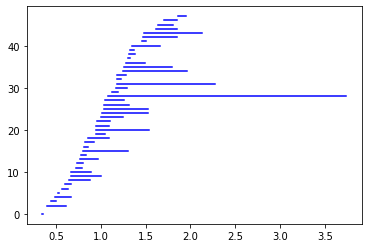

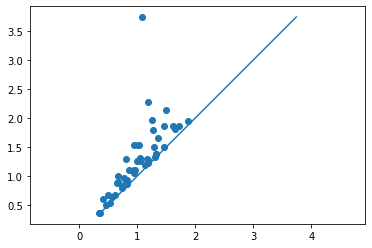

In [4]:
prime = 23 #choose the prime base for the coefficient field that we use to construct the persistence cohomology.

vr = dionysus.fill_rips(annulus, 2, 4.) #Vietoris-Rips complex
cp = dionysus.cohomology_persistence(vr, prime, True) #Create the persistent cohomology based on the chosen parameters.
dgms = dionysus.init_diagrams(cp, vr) #Calculate the persistent diagram using the designated coefficient field and complex.
dionysus.plot.plot_bars(dgms[1], show=True) 
dionysus.plot.plot_diagram(dgms[1], show=True) 
#dionysus.plot.plot_diagram(dgms[0], show=True) 
#Plot the barcode and diagrams using matplotlib incarnation within Dionysus2. This mechanism is different in Dionysus.

## Step 3 - Selecting the cocycle and visualization.

In [5]:
type(plt)

module

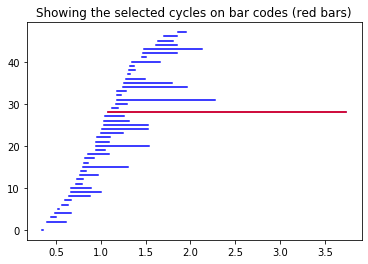

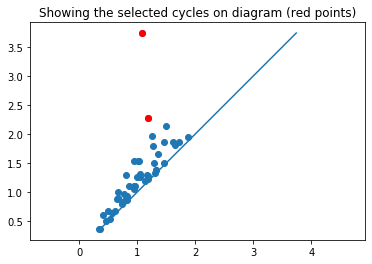

In [6]:
threshold = 1
bars = [bar for bar in dgms[1] if bar.death-bar.birth > threshold] #choosing cocycle that persist at least threshold=1.
cocycles = [cp.cocycle(bar.data) for bar in bars]
#plt is the matplotlib incarnation.

#Red highlight cocyles that persist more than threshold value on barcode, when more than one cocyles have persisted over threshold values, this plots the first one.
dionysus.plot.plot_bars(dgms[1], show=False)
plt.plot([[bar.birth,bar.death] for bar in dgms[1] if bar.death-bar.birth > threshold][0],[[x,x] for x,bar in enumerate(dgms[1]) if bar.death-bar.birth > threshold][0],'r')
plt.title('Showing the selected cycles on bar codes (red bars)')
plt.show()

#Red highlight ***ALL*** cocyles that persist more than threshold value on diagram.
dionysus.plot.plot_diagram(dgms[1], show=False)
Lt1 = [[point.birth,point.death] for point in dgms[1] if point.death-point.birth > threshold] 
for Lt3 in Lt1:
    #print(Lt3)
    plt.plot(Lt3[0],Lt3[1],'ro')
plt.title('Showing the selected cycles on diagram (red points)')
plt.show()


In [7]:
chosen_cocycle= cocycles[0]
chosen_bar= bars[0]

## Step 4 - First smoothing using Least Squares (Optional)

If it is computed the smoothed coefficients can be used as initial condition for the optimization code

In [8]:
vr_8 = dionysus.Filtration([s for s in vr if s.data <= max([bar.birth for bar in bars])])
coords = dionysus.smooth(vr_8, chosen_cocycle, prime)

### Visualization

In [9]:
np.shape(annulus.T)
annulus.T[1,:]

array([-2.67297357e+00,  1.92811545e+00, -2.07344353e+00, -3.16396100e-01,
        3.51368304e+00,  1.43497297e+00,  2.17584647e+00,  3.51767289e-01,
       -2.54446617e+00, -2.29006522e+00, -3.94531070e+00,  6.90364498e-01,
        1.86194554e-01, -2.24201123e+00, -1.25326058e+00, -1.84209995e+00,
       -6.63242728e-01,  2.17909035e+00,  2.84154912e+00, -2.09228777e+00,
        2.37503061e+00, -3.62229863e+00,  1.66316632e+00,  2.55375755e+00,
        2.04463591e+00, -2.71364944e+00,  1.81651136e+00,  9.19350472e-01,
       -3.74783352e+00, -8.67159814e-01, -1.30042089e+00, -2.53883049e+00,
       -2.69529872e+00,  1.41612006e+00,  2.73801797e+00, -1.23679745e+00,
        1.91093746e+00,  2.51003104e+00,  8.66874829e-02,  2.25496314e+00,
        3.38333865e+00,  5.00586171e-01, -2.63268238e+00, -8.69632887e-01,
       -3.75661146e+00,  2.02164813e+00,  2.30283584e+00,  2.60955521e+00,
        2.82712377e+00,  3.06482331e+00, -1.97529404e+00,  3.20199804e+00,
        2.09388787e+00,  

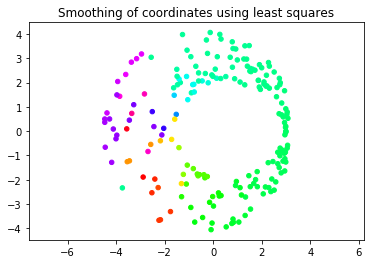

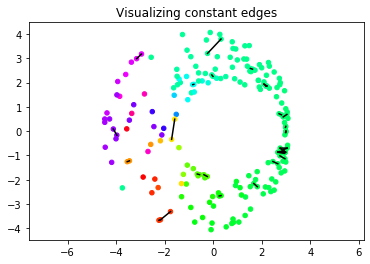

In [10]:
#plt.rcParams['lines.markersize'] = 150
scatter(annulus.T[0,:],annulus.T[1,:],s=20, c=coords, cmap="hsv")
plt.axis('equal')
plt.title('Smoothing of coordinates using least squares')
plt.show()

toll = 1e-5
p,val = (chosen_bar,coords)
edges_costant = []
thr = p.birth # i want to check all edges that were there when the cycle was created
for s in vr:
    if s.dimension() != 1:
        continue
    elif s.data > thr:
        break
    if abs(val[s[0]]-val[s[1]]) <= toll:
        edges_costant.append([annulus[s[0],:],annulus[s[1],:]])
edges_costant = np.array(edges_costant)
scatter(annulus.T[0,:],annulus.T[1,:],s=20, c=coords, cmap="hsv")
plot(edges_costant.T[0,:],edges_costant.T[1,:], c='k')
plt.axis('equal')
plt.title('Visualizing constant edges')
plt.show()

## Step 5 - Second smoothing using a new cost function

In [11]:
import utils
l2_cocycle,f,bdry = utils.optimizer_inputs(vr, bars, chosen_cocycle, coords, prime)

In [12]:
#l2_cocycle.reshape(-1, 1)
l2_cocycle = l2_cocycle.reshape(-1, 1)
l2_cocycle.shape
f-bdry*l2_cocycle

array([[-1.38777878e-17],
       [ 0.00000000e+00],
       [-1.04083409e-16],
       ...,
       [ 5.12351966e-01],
       [-1.19660617e-01],
       [ 1.66261062e-01]])

In [13]:
##It does not seem to work to have double invokes here...
import scipy as scp
from scipy.optimize import minimize
#cost = lambda z: cost_functions.cost_Lpnorm_mvj(z, F= f, B= bdry, p= 20)
#grad = lambda z: cost_functions.grad_Lpnorm_mvj(z, F= f, B= bdry, p= 20)
def cost(z):
    import cost_functions
    return cost_functions.cost_Lpnorm_mvj(z, F= f, B= bdry, p= 20)

def grad(z):
    import cost_functions
    return cost_functions.grad_Lpnorm_mvj(z, F= f, B= bdry, p= 20)

#res = minimize(cost, l2_cocycle, method='L-BFGS-B', jac = grad)
res=scp.optimize.minimize(cost, l2_cocycle, method="Nelder-Mead") 
res

 final_simplex: (array([[-0.15654244,  0.30254809,  0.02461396, ..., -0.21795177,
        -0.32943484,  0.31398654],
       [-0.15100648,  0.30154702,  0.02128025, ..., -0.21236366,
        -0.32904621,  0.32428457],
       [-0.15094246,  0.30268019,  0.02272411, ..., -0.21557882,
        -0.32885287,  0.32012438],
       ...,
       [-0.14667444,  0.30267426,  0.02113811, ..., -0.20765775,
        -0.32691573,  0.31562598],
       [-0.14146627,  0.30198959,  0.02231544, ..., -0.20575862,
        -0.32607246,  0.31149557],
       [-0.14709596,  0.30382725,  0.02199775, ..., -0.2093597 ,
        -0.32761893,  0.31333989]]), array([1.17904367, 1.17931379, 1.17951676, 1.17956973, 1.17969746,
       1.17987906, 1.17993813, 1.18002342, 1.18003697, 1.18006624,
       1.18008764, 1.18012026, 1.18014917, 1.1801756 , 1.18030028,
       1.18034138, 1.18041564, 1.18045239, 1.18050395, 1.18062647,
       1.18066172, 1.18070362, 1.18073966, 1.1807807 , 1.18083391,
       1.180891  , 1.18093166, 1.1

In [ ]:
import tensorflow as tf
#import tensorflow_probability as tfp
'''Following seems deprecated in newer version of tfp
#pip install --upgrade tensorflow-probability==0.70
#alternatively, we can use tensorflow to minimize the cost function without gradient information, here we can use multiple black-box functions like Adams
#For more: Check at https://www.tensorflow.org/probability/api_docs/python/tfp/math/minimize
x = tf.Variable(0.)
cost_fun = lambda: cost_functions.cost_Lpnorm_mvj(x, F= f, B= bdry, p= 20)
res_tfp=tfp.math.minimize(
        cost_fun,
        num_steps=1000,
        optimizer=tfp.optimizers.Adam(learning_rate=0.1)
        )
'''
#Following seems working, c.f. 
#https://stackoverflow.com/questions/55552715/tensorflow-2-0-minimize-a-simple-function
def cost(z):
    import cost_functions
    return cost_functions.cost_Lpnorm_mvj(z, F= f, B= bdry, p= 20)
#type(bdry)
#scipy.sparse.csr.csr_matrix
B_mat = bdry.todense()
import tensorflow as tf
#print(f.shape)
#print((B_mat*l2_cocycle).shape)
z = tf.Variable(l2_cocycle, trainable=True)

#L1 in tensorflow language
cost_z = tf.reduce_sum( tf.abs(f - B_mat @ z) )
#L2 in tensorflow language
cost_z = tf.reduce_sum( tf.pow( tf.abs(f - B_mat @ z),2 ) )
#Lp+alpha*Lq norm in tensorflow language
lp=2
lq=1
alpha=0
cost_z = (1-alpha)*tf.pow( tf.reduce_sum( tf.pow( tf.abs(f - B_mat @ z),lp ) ), 1/lp) + alpha* tf.pow( tf.reduce_sum( tf.pow( tf.abs(f - B_mat @ z),lq ) ), 1/lq)

#Gradient Descedent Optimizer
opt_gd = tf.train.GradientDescentOptimizer(0.1).minimize(cost_z)
#Adams Optimizer
opt_adams = tf.train.AdamOptimizer(1e-4).minimize(cost_z)
#The latter is much better in terms of result

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):#How many iterations you want to run?
        #print(sess.run([x,loss]))
        sess.run(opt_adams)
    res_tf=sess.run([z,cost_z])
#type(res_tf)
#print(res_tf)
res_tf=res_tf[0]
#res_tf
color = np.mod(res_tf.T[0,:],1)
'''
scatter(annulus.T[0,:],annulus.T[1,:],s=20, c=color, cmap="hsv")
#scatter(*annulus.T, c= color, cmap="hsv")
plt.colorbar()
plt.axis('equal')
plt.title('Smoothed values mod 1 - {}*L{} + {}*L{} elastic norm with TensorFlow'.format(1-alpha,lp,alpha,lq))
plot(edges_constant.T[0,:],edges_constant.T[1,:], c='k')
plt.show()
'''
toll = 1e-5
edges_constant = []
thr = chosen_bar.birth # i want to check constant edges in all edges that were there when the cycle was created
for s in vr:
    if s.dimension() != 1:
        continue
    elif s.data > thr:
        break
    if abs(color[s[0]]-color[s[1]]) <= toll:
        edges_constant.append([annulus[s[0],:],annulus[s[1],:]])
edges_constant = np.array(edges_constant)        
#scatter(*annulus.T, c=color, cmap="hsv", alpha=.5)
scatter(annulus.T[0,:],annulus.T[1,:],s=20, c=color, cmap="hsv")
plt.colorbar()
plt.axis('equal')
plt.title('Smoothed values mod 1 - {}*L{} + {}*L{} elastic norm with TensorFlow'.format(1-alpha,lp,alpha,lq))
#plot(*edges_constant.T, c='k')
plot(edges_constant.T[0,:],edges_constant.T[1,:], c='k', alpha=0.1)
edges_constant.shape
plt.savefig('pqSmoothedValueMod1_{}_L{}+{}_L{}TF.png'.format(1-alpha,lp,alpha,lq))
plt.show()